In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import math
import sys
from scipy.stats import spearmanr

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
impIterative = IterativeImputer(missing_values=np.nan, sample_posterior=True, imputation_order='random')

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import time
start = time.time()
full_dataset = pd.read_pickle("./full_dataset.pkl")
end = time.time()
print(f'Elapsed Time: {(end-start)} seconds')

Elapsed Time: 20.954282760620117 seconds


In [3]:
full_dataset

,CHILDID,PARENTID,S1_ID,S2_ID,S3_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,S6_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,0001001C,0001001P,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001002C,0001002P,1.0,1.0,NaN,6005.0,6005.0,6005.0,6005.0,A053,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,0001003C,0001003P,1.0,1.0,NaN,9997.0,9997.0,9997.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001004C,0001004P,1.0,1.0,NaN,6009.0,6009.0,6009.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001005C,0001005P,1.0,1.0,NaN,3.0,7197.0,7197.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116024C,3116024P,3116.0,3116.0,NaN,3116.0,7294.0,7294.0,7294.0,3116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,5213040C,5213040P,NaN,NaN,NaN,5213.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,5245040C,5245040P,NaN,NaN,NaN,5245.0,5245.0,5245.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,5245041C,5245041P,NaN,NaN,NaN,5245.0,5245.0,5245.0,5245.0,A290,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Determining the Best Y-Variable

In [4]:
new_dataset = full_dataset.copy()

In [5]:
dtypes = new_dataset.dtypes
columns = new_dataset.columns

In [6]:
column_names = []

for c in columns:
    if (str(dtypes[c]) != 'float64'):
        column_names.append(c)

new_dataset = new_dataset.drop(columns=column_names)

In [7]:
new_dataset

,S1_ID,S2_ID,S3_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,D2T_ID,D4T_ID,D5T_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,6005.0,6005.0,6005.0,6005.0,NaN,-2.0,-2.0,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,1.0,1.0,NaN,9997.0,9997.0,9997.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,6009.0,6009.0,6009.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,3.0,7197.0,7197.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116.0,3116.0,NaN,3116.0,7294.0,7294.0,7294.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,NaN,NaN,NaN,5213.0,NaN,NaN,NaN,NaN,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,NaN,NaN,NaN,5245.0,5245.0,5245.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,NaN,NaN,NaN,5245.0,5245.0,5245.0,5245.0,NaN,-2.0,-2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Removing columns with high NaNs

In [8]:
def remove_highest_empties(df):
    empty_limit = len(df) * 0.60
    column_names = []
    
    for column_name, _ in df.iteritems():
        if (df[column_name].isna().sum() > empty_limit):
            column_names.append(column_name)
    
    df = df.drop(columns=column_names)
    return df

In [9]:
new_dataset = remove_highest_empties(new_dataset)
new_dataset

,S1_ID,S2_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,D4T_ID,D5T_ID,D6T_ID,D7T_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,1.0,1.0,2.0,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,6005.0,6005.0,6005.0,6005.0,-2.0,-2.0,-2.0,-2.0,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,1.0,1.0,9997.0,9997.0,9997.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,6009.0,6009.0,6009.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,3.0,7197.0,7197.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116.0,3116.0,3116.0,7294.0,7294.0,7294.0,-2.0,-2.0,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,NaN,NaN,5213.0,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,NaN,NaN,5245.0,5245.0,5245.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,NaN,NaN,5245.0,5245.0,5245.0,5245.0,-2.0,-2.0,-2.0,-2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Determining the Correlation Between Values

In [10]:
def find_correlation(df, column_name):
    df_column = df[column_name]
    correlation_dict = {}
    
    for col in new_dataset.columns:
        current_column = new_dataset[col]
        correlation = df_column.corr(current_column)
        correlation_dict[col] = correlation_dict.get(col, correlation)
    
    correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index')
    return correlation_df

In [11]:
def find_highest_correlation(df):
    result_df = df.copy()
    result_df = result_df.T
    
    result_df = result_df.iloc[:, (df >= 0.2).to_numpy()]
    
    return result_df.round(3)

In [12]:
C6_Math_corr = find_correlation(new_dataset, 'C6R4MPF')

In [13]:
C6_Math_corr = find_highest_correlation(C6_Math_corr)

In [14]:
C6_Math_corr

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,...,C6EARTS5,C7R4RSCL,C7R4RTSC,C7R4MNR8,C7R4MSCL,C7R4MTSC,C7R2SNR8,C7R2SSCL,C7R2STSC,C6MTHFLG
0,0.23,0.221,0.233,0.236,0.225,0.209,0.208,0.25,0.265,0.264,...,0.237,0.22,0.221,0.244,0.287,0.286,0.216,0.247,0.248,0.201


### Remove the variable relating to 5th Grade and Above

In [15]:
def remove_unusable_variables(df):
    unusable_columns = []
    
    for column_name, _ in df.iteritems():
        if ('5' in column_name) or ('6' in column_name) or ('7' in column_name) or ('8' in column_name):
            if (column_name != 'C6R4MPF'):
                unusable_columns.append(column_name)
    
    df = df.drop(columns=unusable_columns)
    return df

In [16]:
C6_Math_corr = remove_unusable_variables(C6_Math_corr)
C6_Math_corr

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4,C6R4MPF
0,0.23,0.221,0.233,0.236,0.225,0.209,0.208,0.25,0.265,0.264,0.204,1.0


## Creating a new dataset from the columns with the highest correlation

In [17]:
columns = C6_Math_corr.columns

In [18]:
dataset = new_dataset[columns]

In [19]:
dataset.shape

(21409, 12)

In [20]:
# Number of Non-NA values in each column
dataset.count()

C1R4MNOR    19126
C1R4MSCL    19126
C2R4MNOR    19917
C2R4MSCL    19917
C2R4MTSC    19917
C2R4MPB3    19917
C4R4RSCL    16683
C4R4MNOR    16683
C4R4MSCL    16683
C4R4MTSC    16683
C4R4MPB4    16683
C6R4MPF     11294
dtype: int64

In [21]:
# Number of NA values in each column
dataset.isna().sum()

C1R4MNOR     2283
C1R4MSCL     2283
C2R4MNOR     1492
C2R4MSCL     1492
C2R4MTSC     1492
C2R4MPB3     1492
C4R4RSCL     4726
C4R4MNOR     4726
C4R4MSCL     4726
C4R4MTSC     4726
C4R4MPB4     4726
C6R4MPF     10115
dtype: int64

In [22]:
dataset.groupby('C6R4MPF').size()

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64

In [23]:
cleandf=dataset.copy().dropna(subset=["C6R4MPF"])

In [24]:
cleandf.shape

(11294, 12)

In [25]:
cleandf.isna().sum()

C1R4MNOR    1056
C1R4MSCL    1056
C2R4MNOR     237
C2R4MSCL     237
C2R4MTSC     237
C2R4MPB3     237
C4R4RSCL     304
C4R4MNOR     304
C4R4MSCL     304
C4R4MTSC     304
C4R4MPB4     304
C6R4MPF        0
dtype: int64

In [26]:
print(cleandf.groupby('C6R4MPF').size())

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64


In [27]:
dataset= cleandf[cleandf["C6R4MPF"]>4]
print(dataset.groupby('C6R4MPF').size())

C6R4MPF
5.0    1726
6.0    3660
7.0    3169
8.0    1419
9.0     189
dtype: int64


In [28]:
dataset.shape

(10163, 12)

In [29]:
# Group some categories together
conditions = [
    (dataset['C6R4MPF'] >= 5.0) & (dataset['C6R4MPF'] < 7.0),
    (dataset['C6R4MPF'] >= 7.0) & (dataset['C6R4MPF'] <= 9.0)]
choices = ['C - Low', 'A - High']
scores = np.select(conditions, choices)
dataset.loc[:, 'Score'] = scores
dataset

C:\Users\ekech\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4,C6R4MPF,Score
1,11.0,44.44,14.0,58.93,67.118,0.996,155.63,15.0,76.33,58.738,0.981,8.0,A - High
6,1.0,19.65,3.0,23.60,39.053,0.037,59.83,9.0,38.54,37.160,0.087,6.0,C - Low
9,5.0,26.85,7.0,32.22,48.565,0.433,70.18,13.0,61.06,52.256,0.886,6.0,C - Low
15,8.0,40.94,12.0,48.69,61.352,0.977,85.82,13.0,68.88,55.838,0.956,7.0,A - High
16,9.0,33.26,8.0,35.24,51.243,0.640,66.48,13.0,66.84,54.965,0.945,7.0,A - High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21388,1.0,13.04,5.0,28.17,44.528,0.176,56.27,10.0,51.43,46.820,0.614,7.0,A - High
21399,0.0,17.03,6.0,30.95,47.365,0.344,NaN,NaN,NaN,NaN,NaN,6.0,C - Low
21404,1.0,14.30,3.0,17.49,29.681,0.002,51.40,5.0,28.82,27.830,0.006,5.0,C - Low
21407,NaN,NaN,NaN,NaN,NaN,NaN,60.22,16.0,83.15,61.104,0.990,5.0,C - Low


In [30]:
#remove the C6R4MPF column, now that we have the 'Score' category 
dataset=dataset.drop('C6R4MPF', axis=1)
dataset.head()

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4,Score
1,11.0,44.44,14.0,58.93,67.118,0.996,155.63,15.0,76.33,58.738,0.981,A - High
6,1.0,19.65,3.0,23.60,39.053,0.037,59.83,9.0,38.54,37.160,0.087,C - Low
9,5.0,26.85,7.0,32.22,48.565,0.433,70.18,13.0,61.06,52.256,0.886,C - Low
15,8.0,40.94,12.0,48.69,61.352,0.977,85.82,13.0,68.88,55.838,0.956,A - High
16,9.0,33.26,8.0,35.24,51.243,0.640,66.48,13.0,66.84,54.965,0.945,A - High


In [31]:
print(dataset.groupby('Score').size())

Score
A - High    4777
C - Low     5386
dtype: int64


In [32]:
dataset2=dataset[dataset['Score']=='A - High'].copy()

In [33]:
dataset2=dataset2.append(dataset[dataset['Score']=='C - Low'].sample(n=4777))

In [34]:
print(dataset2.groupby('Score').size())

Score
A - High    4777
C - Low     4777
dtype: int64


In [35]:
sample_size = math.floor(0.75*len(dataset))
sample_size

7622

In [36]:
# Creating our sample of random lines
traindf=dataset.sample(n=sample_size)
#Listing what rows our sample is using
traindf.index

Int64Index([  263, 15755, 20910, 17457,  3460, 20362, 17200,  9902,  3467,
            13931,
            ...
             1905, 16954, 17449,   913,  7112,  6756,  4744,  1188, 16532,
             5446],
           dtype='int64', length=7622)

In [37]:
# Printing training dataset which imputation will be performed on
traindf

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4,Score
263,4.0,26.56,9.0,37.21,52.900,0.750,67.24,14.0,63.05,53.233,0.911,A - High
15755,2.0,18.56,5.0,24.97,40.814,0.062,51.25,13.0,60.10,51.771,0.871,A - High
20910,3.0,23.93,5.0,30.19,46.616,0.292,62.82,11.0,57.02,50.133,0.807,C - Low
17457,4.0,23.37,11.0,46.78,60.099,0.967,107.71,12.0,64.79,54.045,0.929,A - High
3460,1.0,17.15,4.0,24.05,39.651,0.044,52.63,6.0,33.19,32.333,0.023,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...
6756,1.0,18.10,8.0,34.17,50.319,0.571,75.80,12.0,63.28,53.339,0.914,C - Low
4744,2.0,16.11,7.0,28.02,44.366,0.169,50.11,11.0,51.47,46.840,0.616,C - Low
1188,4.0,26.09,12.0,52.42,63.625,0.989,89.14,16.0,99.74,66.359,0.998,A - High
16532,5.0,24.83,6.0,32.51,48.830,0.454,64.78,12.0,64.39,53.861,0.925,A - High


In [38]:
# Defining our validation data as rows in dataset2 that are not in our training data
validationdf=dataset.drop(traindf.index)
len(validationdf)

2541

In [39]:
# taking out all NA's from validation dataset
validationdf=validationdf.dropna()
len(validationdf)

2247

In [40]:
columns = columns.drop('C6R4MPF')

In [41]:
# Do imputation on ALL columns of TRAIN 
X = traindf[columns]

In [42]:
X

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4
263,4.0,26.56,9.0,37.21,52.900,0.750,67.24,14.0,63.05,53.233,0.911
15755,2.0,18.56,5.0,24.97,40.814,0.062,51.25,13.0,60.10,51.771,0.871
20910,3.0,23.93,5.0,30.19,46.616,0.292,62.82,11.0,57.02,50.133,0.807
17457,4.0,23.37,11.0,46.78,60.099,0.967,107.71,12.0,64.79,54.045,0.929
3460,1.0,17.15,4.0,24.05,39.651,0.044,52.63,6.0,33.19,32.333,0.023
...,...,...,...,...,...,...,...,...,...,...,...
6756,1.0,18.10,8.0,34.17,50.319,0.571,75.80,12.0,63.28,53.339,0.914
4744,2.0,16.11,7.0,28.02,44.366,0.169,50.11,11.0,51.47,46.840,0.616
1188,4.0,26.09,12.0,52.42,63.625,0.989,89.14,16.0,99.74,66.359,0.998
16532,5.0,24.83,6.0,32.51,48.830,0.454,64.78,12.0,64.39,53.861,0.925


In [43]:
data_imputed=pd.DataFrame(impIterative.fit_transform(X),columns=columns)

In [44]:
data_imputed

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4
0,4.00000,26.56000,9.0,37.21,52.900,0.750,67.24,14.0,63.05,53.233,0.911
1,2.00000,18.56000,5.0,24.97,40.814,0.062,51.25,13.0,60.10,51.771,0.871
2,3.00000,23.93000,5.0,30.19,46.616,0.292,62.82,11.0,57.02,50.133,0.807
3,4.00000,23.37000,11.0,46.78,60.099,0.967,107.71,12.0,64.79,54.045,0.929
4,1.00000,17.15000,4.0,24.05,39.651,0.044,52.63,6.0,33.19,32.333,0.023
...,...,...,...,...,...,...,...,...,...,...,...
7617,1.00000,18.10000,8.0,34.17,50.319,0.571,75.80,12.0,63.28,53.339,0.914
7618,2.00000,16.11000,7.0,28.02,44.366,0.169,50.11,11.0,51.47,46.840,0.616
7619,4.00000,26.09000,12.0,52.42,63.625,0.989,89.14,16.0,99.74,66.359,0.998
7620,5.00000,24.83000,6.0,32.51,48.830,0.454,64.78,12.0,64.39,53.861,0.925


In [45]:
len(data_imputed)

7622

In [46]:
#Create a new column in data_imputed that doesn't exist yet to tack on the y-variable
data_imputed["Score"]=traindf['Score'].values

In [47]:
data_imputed

,C1R4MNOR,C1R4MSCL,C2R4MNOR,C2R4MSCL,C2R4MTSC,C2R4MPB3,C4R4RSCL,C4R4MNOR,C4R4MSCL,C4R4MTSC,C4R4MPB4,Score
0,4.00000,26.56000,9.0,37.21,52.900,0.750,67.24,14.0,63.05,53.233,0.911,A - High
1,2.00000,18.56000,5.0,24.97,40.814,0.062,51.25,13.0,60.10,51.771,0.871,A - High
2,3.00000,23.93000,5.0,30.19,46.616,0.292,62.82,11.0,57.02,50.133,0.807,C - Low
3,4.00000,23.37000,11.0,46.78,60.099,0.967,107.71,12.0,64.79,54.045,0.929,A - High
4,1.00000,17.15000,4.0,24.05,39.651,0.044,52.63,6.0,33.19,32.333,0.023,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...
7617,1.00000,18.10000,8.0,34.17,50.319,0.571,75.80,12.0,63.28,53.339,0.914,C - Low
7618,2.00000,16.11000,7.0,28.02,44.366,0.169,50.11,11.0,51.47,46.840,0.616,C - Low
7619,4.00000,26.09000,12.0,52.42,63.625,0.989,89.14,16.0,99.74,66.359,0.998,A - High
7620,5.00000,24.83000,6.0,32.51,48.830,0.454,64.78,12.0,64.39,53.861,0.925,A - High


In [48]:
dtypes = data_imputed.dtypes

In [49]:
dtypes[(dtypes != "float64")]

Score    object
dtype: object

In [50]:
data_imputed.shape

(7622, 12)

In [51]:
print(data_imputed.groupby('Score').size())

Score
A - High    3593
C - Low     4029
dtype: int64


In [52]:
# Split-out train dataset
array = data_imputed.values
X_train = array[:,0:-1]
Y_train= array[:,-1]
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=100000, multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier(criterion='gini', n_estimators=100, n_jobs=2)))

In [54]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.742850 (0.012028)
LDA: 0.742719 (0.013236)
KNN: 0.710313 (0.008859)
CART: 0.654424 (0.012879)
NB: 0.735897 (0.011227)
SVM: 0.740882 (0.013092)
RF: 0.726846 (0.008915)


In [55]:
#Set validation set
X_validation=validationdf.iloc[:,0:-1]
Y_validation=validationdf.iloc[:,-1]

In [56]:
# Make predictions on validation dataset with SVM
 
model = SVC(gamma='scale')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

0.7436582109479306
              precision    recall  f1-score   support

    A - High       0.75      0.68      0.71      1059
     C - Low       0.74      0.80      0.77      1188

    accuracy                           0.74      2247
   macro avg       0.74      0.74      0.74      2247
weighted avg       0.74      0.74      0.74      2247



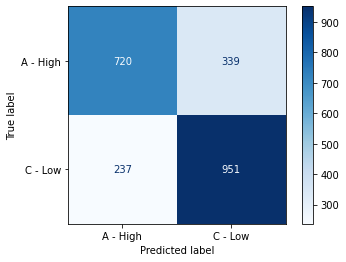

In [57]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
plot_confusion_matrix(model.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions))

In [58]:
# Make predictions on validation dataset with RF
 
model2 = LogisticRegression(max_iter=100000, multi_class='multinomial')
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_validation)

0.7467734757454384
              precision    recall  f1-score   support

    A - High       0.75      0.69      0.72      1059
     C - Low       0.74      0.80      0.77      1188

    accuracy                           0.75      2247
   macro avg       0.75      0.74      0.74      2247
weighted avg       0.75      0.75      0.75      2247



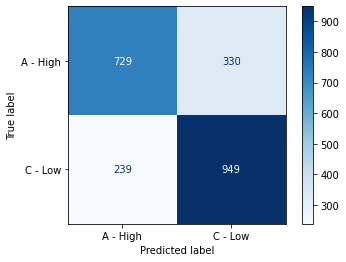

In [59]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions2))
plot_confusion_matrix(model2.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions2))